In [15]:
import pandas as pd
import numpy as np

In [16]:
def manhattan_distance(x1, x2):
    """Tính khoảng cách Manhattan giữa hai điểm"""
    return np.sum(np.abs(x1 - x2))

In [17]:
def kmeans(X, k, max_iters=100):
    """Thuật toán K-means với khoảng cách Manhattan"""
    # Chuyển đổi DataFrame thành numpy array nếu cần
    if isinstance(X, pd.DataFrame):
        # Chỉ lấy các cột số (bỏ qua cột tên nếu có)
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X_array = X[numeric_columns].values
    else:
        X_array = X
    
    n_samples, n_features = X_array.shape
    
    # Khởi tạo ngẫu nhiên các centroid
    idx = np.random.choice(n_samples, k, replace=False)
    centroids = X_array[idx]
    
    for _ in range(max_iters):
        # Gán nhãn cụm
        labels = np.array([np.argmin([manhattan_distance(x, c) for c in centroids]) for x in X_array])
        
        # Cập nhật centroid
        new_centroids = np.array([X_array[labels == i].mean(axis=0) for i in range(k)])
        
        # Kiểm tra hội tụ
        if np.allclose(centroids, new_centroids, atol=1e-6):
            break
        centroids = new_centroids
    
    return labels, centroids

In [20]:
import matplotlib.pyplot as plt

def elbow_method(X, max_k=10):
    """Khảo sát số cụm k bằng phương pháp Elbow"""
    # Chuyển đổi DataFrame thành numpy array nếu cần
    if isinstance(X, pd.DataFrame):
        # Chỉ lấy các cột số (bỏ qua cột tên nếu có)
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X_array = X[numeric_columns].values
        print(f"Sử dụng các cột: {list(numeric_columns)}")
    else:
        X_array = X
    
    print(f"Kích thước dữ liệu: {X_array.shape}")
    
    inertias = []
    for k in range(1, max_k + 1):
        labels, centroids = kmeans(X_array, k)
        inertia = 0
        for i in range(len(X_array)):
            inertia += manhattan_distance(X_array[i], centroids[labels[i]])
        inertias.append(inertia)
        print(f"k={k}, inertia={inertia:.2f}")
    
    # Vẽ biểu đồ Elbow
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), inertias, 'bo-')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    
    return inertias

Loading Countries.csv...
Dữ liệu gốc: (200, 3)
Các cột: ['name', 'Longitude', 'Latitude']
Kiểu dữ liệu các cột:
name          object
Longitude    float64
Latitude     float64
dtype: object

Một vài dòng đầu tiên:
              name   Longitude   Latitude
0            China  103.819074  36.561765
1   CÃ´te d'Ivoire   -5.569216   7.628426
2         Cameroon   12.739642   5.691098
3  Dem. Rep. Congo   23.643961  -2.877463
4            Congo   15.219658  -0.837875

Thực hiện Elbow Method...
Sử dụng các cột: ['Longitude', 'Latitude']
Kích thước dữ liệu: (200, 2)
k=1, inertia=14935.06
k=2, inertia=12396.04
k=3, inertia=8133.87
k=4, inertia=7103.89
k=5, inertia=6321.18
k=6, inertia=5798.75
k=7, inertia=4918.25
k=8, inertia=4661.80


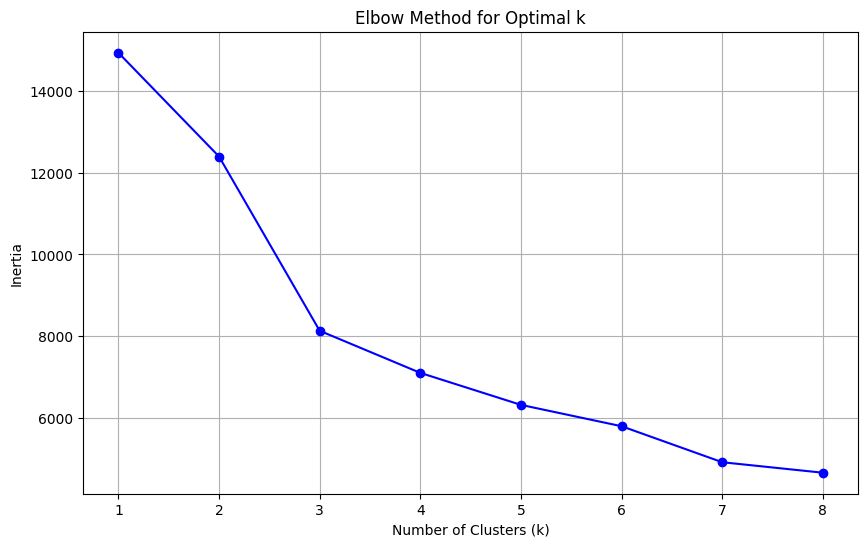

In [21]:
def visualize_clusters(X, k=3):
    """Trực quan hóa kết quả phân cụm"""
    if isinstance(X, pd.DataFrame):
        numeric_columns = X.select_dtypes(include=[np.number]).columns
        X_array = X[numeric_columns].values
    else:
        X_array = X
    
    labels, centroids = kmeans(X_array, k)
    
    plt.figure(figsize=(12, 8))
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
    
    for i in range(k):
        cluster_points = X_array[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   c=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)
    
    # Vẽ centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='black', marker='x', s=200, linewidths=3, label='Centroids')
    
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return labels, centroids

# Thực thi trên tập dữ liệu Countries
print("Loading Countries.csv...")
X = pd.read_csv('Countries.csv')
print(f"Dữ liệu gốc: {X.shape}")
print(f"Các cột: {list(X.columns)}")
print(f"Kiểu dữ liệu các cột:")
print(X.dtypes)
print("\nMột vài dòng đầu tiên:")
print(X.head())
print("\nThực hiện Elbow Method...")
inertias = elbow_method(X, max_k=8)